In [1]:
import pandas as pd

#### 1. Use the corpus from exercise no. 1 or any other Polish corpus of comparable size.

In [89]:
import glob

def load_bills(
    path,
    extension= "txt"
):
    paths = glob.glob(f"{path}/*.{extension}")
    for file_path in paths:
        with open(file_path) as f:
            yield (
                file_path.split("/")[-1],
                f.read(),
            )

bills = list(load_bills(path="/Users/mateusz/nlp/bills"))

In [90]:
import regex

def normalize(content: str):
    return regex.sub(r"\s+", " ", content.strip().lower())

for idx in range(len(bills)):
    filename, content = bills[idx]
    normalized_content = normalize(content)
    bills[idx] = (filename, normalized_content)

#### 2. Make sure the texts in the corpus does not contain HTML code.

In [91]:
from bs4 import BeautifulSoup

with_html_code = []

for filename, content in bills:
    if bool(BeautifulSoup(content, "html.parser").find()):
        with_html_code.append((filename, content))

print(len(with_html_code))

0


#### 3. Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus

In [20]:
# !python3 -m spacy download pl_core_news_sm

In [92]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish
# nlp = Polish()
# tokenizer = Tokenizer(nlp.vocab)

# Alternatively:
nlp = spacy.load("pl_core_news_sm")
tokenizer = nlp.tokenizer

In [93]:
tokenized_bills = []

for filename, content in bills:
    tokenized_bills.append((filename, tokenizer(content)))

#### 4. Compute frequency list for each of the processed files.

In [133]:
def reject(token_str):
    """Reject all entries that are shorter than 2 characters or contain non-letter characters"""
    # letter_characters = regex.compile(
    #     r"\p{L}", regex.I
    # ).findall(token_str)
    search_res = regex.search(r"[\W\d_]", token_str)

    if len(token_str) > 2 and search_res is None:
        return False
    return True

In [138]:
def get_frequencies(tokenized_content: str):
    """Get tokens with occurence frequency higher than 2"""
    counts = {}
    for token in tokenized_content:
        token = token.text
        if token not in counts:
            counts[token] = 1
        else:
            counts[token] += 1
    
    tmp = dict(sorted(
        counts.items(), key=lambda pair: pair[1], reverse=True
    ))

    return dict(filter(lambda pair: reject(pair[0]) == False, tmp.items()))
    

In [139]:
frequencies = []

for _, tokenized_content in tokenized_bills:
    frequencies.append(
        get_frequencies(tokenized_content)
    )

#### 5. Aggregate the result to obtain one global frequency list.

In [140]:
global_frequencies = {}

for d_frequency in frequencies:
    for token, value in d_frequency.items():
        if token not in global_frequencies:
            global_frequencies[token] = 0
        global_frequencies[token] += value

global_frequencies = dict(sorted(global_frequencies.items(), key=lambda pair: pair[1], reverse=True))

In [141]:
global_frequencies

{'art': 83804,
 'ust': 53636,
 'się': 45886,
 'lub': 45800,
 'poz': 45224,
 'oraz': 33558,
 'mowa': 28783,
 'nie': 22988,
 'przez': 20951,
 'pkt': 19124,
 'dnia': 17954,
 'których': 17932,
 'jest': 13197,
 'ustawy': 13099,
 'może': 12096,
 'jeżeli': 12038,
 'którym': 11789,
 'brzmienie': 10576,
 'spraw': 10021,
 'otrzymuje': 9835,
 'albo': 8708,
 'dodaje': 8423,
 'ich': 8199,
 'dla': 7934,
 'pracy': 7631,
 'minister': 7577,
 'której': 7476,
 'brzmieniu': 7295,
 'drodze': 7179,
 'podstawie': 6849,
 'stosuje': 6680,
 'przypadku': 6494,
 'niż': 6452,
 'tym': 6366,
 'jego': 6320,
 'być': 6120,
 'zakresie': 6098,
 'właściwy': 6094,
 'państwa': 5839,
 'przepisy': 5836,
 'wyrazy': 5817,
 'ustawie': 5478,
 'także': 5445,
 'przepisów': 5343,
 'rozporządzenia': 5338,
 'tych': 5048,
 'określonych': 5043,
 'osób': 4904,
 'postępowania': 4901,
 'terminie': 4825,
 'zastępuje': 4818,
 'działalności': 4742,
 'przed': 4697,
 'ochrony': 4606,
 'osoby': 4599,
 'wniosek': 4595,
 'innych': 4593,
 'urzędu':

In [145]:
import pandas as pd

df = pd.DataFrame({
    'token': list(global_frequencies.keys()),
    'count': list(global_frequencies.values())
})

df['rank'] = df['count'].rank(ascending=False).astype('int')

In [146]:
df.head()

,token,count,rank
0,art,83804,1
1,ust,53636,2
2,się,45886,3
3,lub,45800,4
4,poz,45224,5


In [147]:
df.tail()

,token,count,rank
54939,alkoholomierza,1,46894
54940,użytą,1,46894
54941,odwadnia,1,46894
54942,odkaża,1,46894
54943,tytoniowej,1,46894


#### 7. Make a plot in a logarithmic scale (for X and Y):
- X-axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences; the terms with the same number of occurrences should be ordered by their name,

- Y-axis should contain the number of occurrences of the term with given rank.

<AxesSubplot:xlabel='rank'>

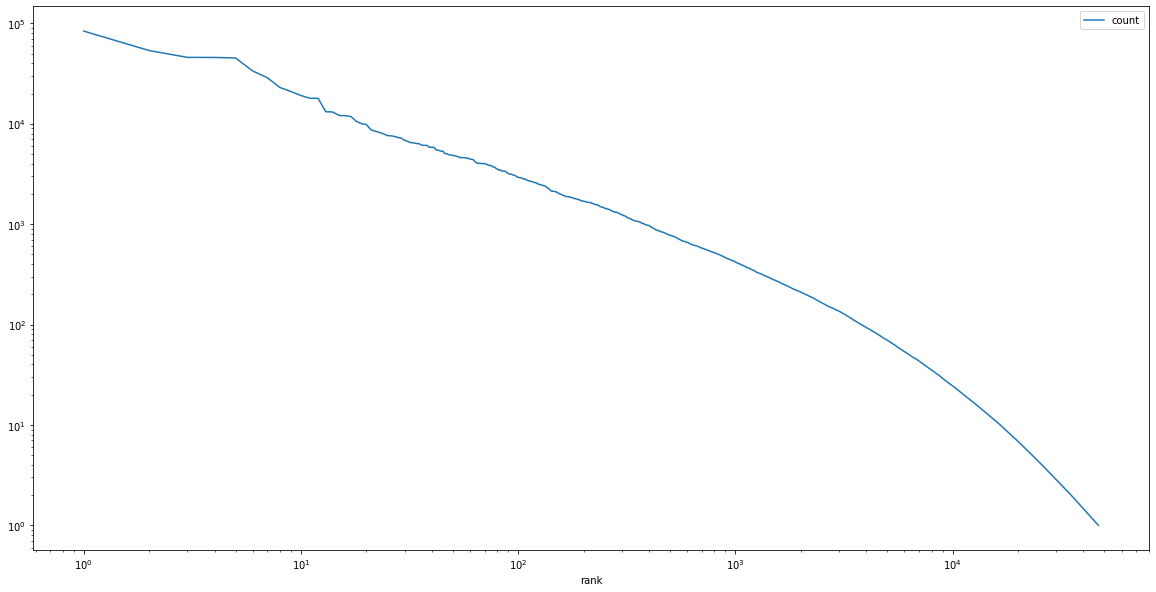

In [148]:
df.plot(x='rank', y='count', loglog=True, figsize=(20, 10))

#### SGJP

In [105]:
df_sgjp = pd.read_csv("./sgjp-20221106.csv", sep="\t", header=None)

sgjp = df_sgjp.loc[:, 0].values
df_sgjp.head()

,0,1,2,3,4
0,AA,AA:Sm1_pt,subst:pl:nom.gen.dat.acc.inst.loc.voc:m1:pt,nazwa_organizacji,NaN
1,AA,AA:Sm3.n_ncol,subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:m3,nazwa_firmy,NaN
2,AA,AA:Sm3.n_ncol,subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:n:ncol,nazwa_firmy,NaN
3,AAP,AAP,subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:f,nazwa_instytucji,NaN
4,ABB,ABB,subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:n:ncol,nazwa_firmy,NaN


In [106]:
"liczby" in sgjp

True

#### 9. Find 30 words with the highest ranks that do not belong to the dictionary.

##### We need to move to Google Colab to perform tasks with Morfeusz. <br>
https://colab.research.google.com/drive/1J5tD5TYne5StH1GU1udYpq23zPHjMq2v
or lab03_morfeusz.ipynb

In [149]:
df.to_parquet(path='df_bills.parquet')

# This parquet file has been manually uploaded to GDrive and downloaded in GCollab.

#### 12. Load SGJP dictionary (Słownik SGJP dane tekstowe) to ElasticSearch (one document for each form) and use fuzzy matching to obtain the possible corrections of the 30 words with 5 occurrences that do not belong to the dictionary.

In [5]:
from elasticsearch import Elasticsearch, helpers
from elasticsearch_dsl import Search

es = Elasticsearch("http://localhost:9200")

In [151]:
es.info()['version']

{'number': '8.4.3',
 'build_flavor': 'default',
 'build_type': 'docker',
 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73',
 'build_date': '2022-10-04T07:17:24.662462378Z',
 'build_snapshot': False,
 'lucene_version': '9.3.0',
 'minimum_wire_compatibility_version': '7.17.0',
 'minimum_index_compatibility_version': '7.0.0'}

In [159]:
len(sgjp)

7412267

In [157]:
es.indices.create(
    index="polish_bills",
    mappings={
        "properties": {
            "content": {
                "type": "text",
                # The keyword analyzer is a “noop” analyzer which returns the entire input string as a single token.
                "analyzer": "keyword"
        }
    }
})

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'polish_bills'}

In [160]:
def map_sgjp_words_to_es():
    for word_idx, word in enumerate(sgjp):
        yield { 
            '_op_type': 'create',
            '_index': "polish_bills",
            '_id': word_idx,
            'content': word   
        }

In [174]:
from elasticsearch.helpers import parallel_bulk

parallel_bulk(client=es, actions=map_sgjp_words_to_es())

In [2]:
def correct_using_es(word):
    resp = es.search(
        index="polish_bills",
        query={
            'match': {
                'content': {'query': word, 'fuzziness': 2}}
        },
        filter_path=["hits.hits._source.content"])

    if not resp: return ""
    return ", ".join(hit['_source']['content'] for hit in resp['hits']['hits'])

In [163]:
# Read df from Google Collab
df_unknown = pd.read_parquet('df_unknown.parquet')

In [173]:
df_corrections = df_unknown.iloc[:30]
df_corrections['correction'] = df_corrections['token'].apply(correct_using_es)
df_corrections

/var/folders/v2/tn30zgm13l364d0wn_b2lr0w0000gn/T/ipykernel_2926/2541611617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrections['correction'] = df_corrections['token'].apply(correct_using_es)


,token,count,rank,correction
355,późn,1065,355,"późni, późno, późna, późna, późne, późne, późn..."
1409,gmo,298,1408,"emo, emo, emo, emo, emo, emo, emo, emo, emo, emo"
1953,sww,216,1948,"sów, suw, swa, swe, swe, swe, swe, swą, swą, siw"
2153,skw,196,2149,"sków, sów, suw, siw, ska, ski, sakw, kw, Bokw,..."
2541,ike,162,2538,"Mike, Mike, Mike, Nike, Mike, kie, kie, kie, k..."
3327,remediacji,120,3316,"repudiacji, repudiacji, repudiacji, remediach,..."
3719,ure,103,3709,"Bure, Bure, Sure, bure, bure, bure, bure, uje,..."
3899,uke,97,3885,"uje, ule, Bek, Bek, Buce, Buce, Buce, Buje, Bu..."
4501,pkwiu,81,4487,"pawiu, pawiu, pawiu, pawiu, Akwil, Akwilu, Akw..."
4671,udt,77,4648,"udu, udy, uda, uda, uda, udo, udu, ust, ust, Jdt"
